In [15]:
import pandas as pd
import numpy as np

In [16]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\Copy of DATA.xlsx - Sheet1.csv")

In [17]:
df.head()

,Alloy,Tg,Tx,Tl,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,708.0,1226.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,689.0,1200.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,710.0,1220.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,439.0,809.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,488.0,843.0,1.59,15.55,0.10,9.45,0.3


In [18]:
df.shape

(441, 9)

In [19]:
df.isna().sum()

Alloy    0
Tg       0
Tx       0
Tl       0
TEN      0
VA       0
d        0
Sm       0
Dmax     0
dtype: int64

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

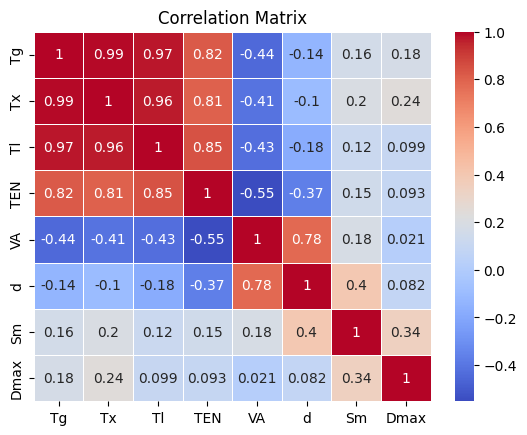

In [21]:
correlation_matrix = df.drop('Alloy', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.drop(["Tx", "Tl"], inplace=True, axis=1)
df.head()

,Alloy,Tg,TEN,VA,d,Sm,Dmax
0,Ti50Cu42.5Ni7.5,670.0,1.76,13.27,0.10,7.90,0.2
1,Zr70Al8Cu19Ni3,630.0,1.48,18.38,0.13,7.92,0.2
2,Zr70Al8Cu3Ni19,640.0,1.48,18.11,0.15,8.05,0.2
3,Ag46.2Mg15.4Ca38.4,407.0,1.48,16.48,0.10,8.79,0.3
4,Ag53.8Mg7.7Ca30.8Cu7.7,428.0,1.59,15.55,0.10,9.45,0.3


In [23]:
type(df['Tg'])

pandas.core.series.Series

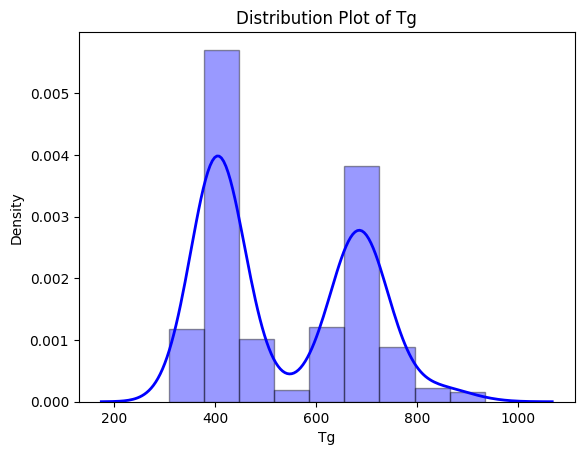

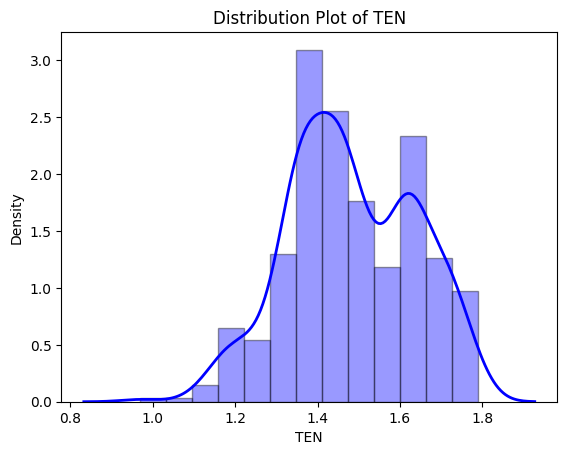

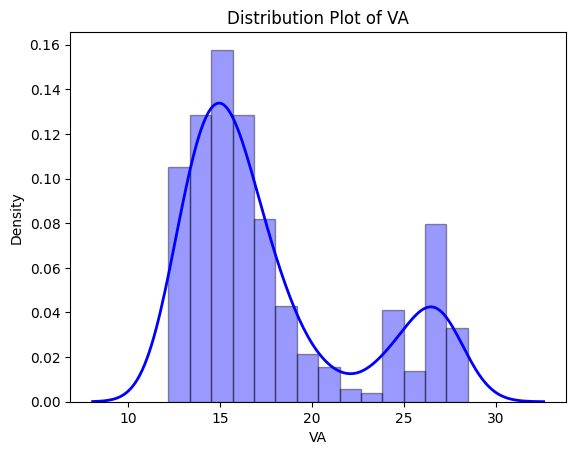

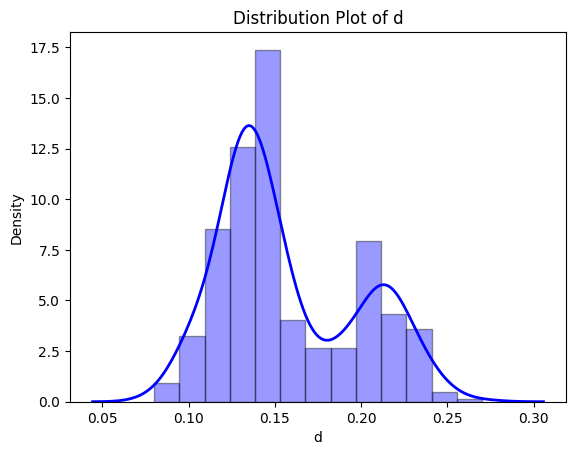

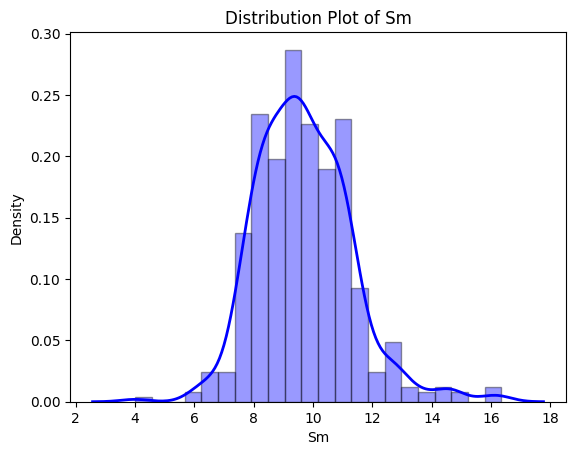

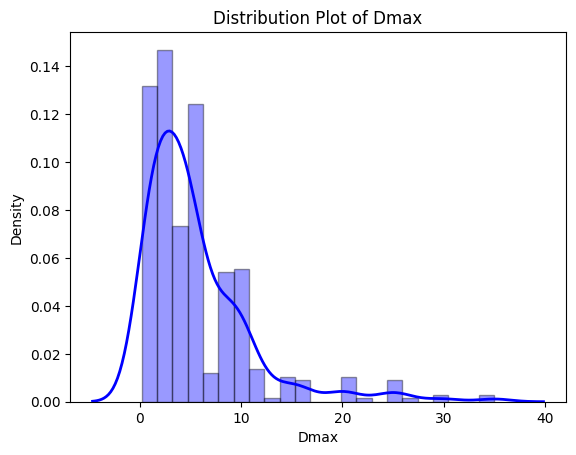

In [24]:
import warnings
for i in df.drop('Alloy', axis=1).columns:
    data = df[i]
    max = df[i].max()
    min = df[i].min()
    bin_width = (max-min)/10
    sns.distplot(data, hist=True, kde=True, color='blue', hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
    warnings.filterwarnings("ignore")
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.title('Distribution Plot of '+ i)
    plt.show()
    warnings.filterwarnings("ignore")

In [25]:
from sklearn.mixture import GaussianMixture
cols = ['Tg','VA','d', 'TEN']
print("Old Shape:", df.shape)
data = df[cols].values
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(data)
densities = gmm.score_samples(data)
threshold = np.percentile(densities, 5)
outliers_indices = np.where(densities < threshold)[0]
df = df.drop(outliers_indices)
print("New Shape:", df.shape)

Old Shape: (441, 7)
New Shape: (419, 7)


In [26]:
X = df.iloc[ : , 1:-1]
y = df.iloc[ : , -1]
print(X.head())
print(y.head())
print('Shape of X is:', X.shape)
print('Shape of y is:', y.shape)


      Tg   TEN     VA     d    Sm
0  670.0  1.76  13.27  0.10  7.90
1  630.0  1.48  18.38  0.13  7.92
2  640.0  1.48  18.11  0.15  8.05
3  407.0  1.48  16.48  0.10  8.79
4  428.0  1.59  15.55  0.10  9.45
0    0.2
1    0.2
2    0.2
3    0.3
4    0.3
Name: Dmax, dtype: float64
Shape of X is: (419, 5)
Shape of y is: (419,)


In [27]:
# pip install xgboost

In [28]:
# from sklearn.model_selection import RepeatedKFold
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# from sklearn.svm import SVR
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras import regularizers

# mse_values_rf = []
# mse_values_xgb = []
# mse_values_svr = []
# mse_values_nn = []
# mse_values_train = []

# rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=42)

# for train_index, test_index in rkf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
#     rf_model.fit(X_train, y_train)
#     y_pred = rf_model.predict(X_test)
#     mse_rf = mean_squared_error(y_test, y_pred)
#     mse_values_rf.append(mse_rf)
#     y_pred1 = rf_model.predict(X_train)
#     mse_rf1 = mean_squared_error(y_train, y_pred1)
#     mse_values_train.append(mse_rf1)

#     xgb_model = xgb.XGBRegressor()
#     xgb_model.fit(X_train, y_train)
#     y_pred = xgb_model.predict(X_test)
#     mse_xgb = mean_squared_error(y_test, y_pred)
#     mse_values_xgb.append(mse_xgb)
    
#     svr_model = SVR(kernel='linear')
#     svr_model.fit(X_train, y_train)
#     y_pred = svr_model.predict(X_test)
#     mse_svr = mean_squared_error(y_test, y_pred)
#     mse_values_svr.append(mse_svr)

#     nn_model = Sequential([
#                             Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05), input_shape=(X_train.shape[1],)),
#                             # Dropout(0.5),
#                             Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.05)),
#                             # Dropout(0.5),
#                             Dense(1)
#     ])
#     nn_model.compile(optimizer='adam', loss='mean_squared_error')
#     nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
#     y_pred = nn_model.predict(X_test)
#     mse_nn = mean_squared_error(y_test, y_pred)
#     mse_values_nn.append(mse_nn)

# mse_values_rf = np.array(mse_values_rf)
# print("Average error of Random Forest:", np.mean(mse_values_rf))
# mse_values_xgb = np.array(mse_values_xgb)
# print("Average error of XGBoost:", np.mean(mse_values_xgb))
# mse_values_svr = np.array(mse_values_svr)
# print("Average error of Support Vector:", np.mean(mse_values_svr))
# mse_values_nn = np.array(mse_values_nn)
# print("Average error of Neural Network:", np.mean(mse_values_nn))
# mse_values_train = np.array(mse_values_train)
# print("Average Error of training set:", np.mean(mse_values_train))

In [31]:
# load dataset
from pycaret.datasets import get_data
juice = get_data('juice')
juice.head()


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [34]:
# init setup
from pycaret.classification import *
clf1 = setup(data = juice, target = 'Purchase', polynomial_features = True)
juice.head()

,Description,Value
0,Session id,4943
1,Target,Purchase
2,Target type,Binary
3,Target mapping,"CH: 0, MM: 1"
4,Original data shape,"(1070, 19)"
5,Transformed data shape,"(1070, 190)"
6,Transformed train set shape,"(749, 190)"
7,Transformed test set shape,"(321, 190)"
8,Numeric features,17
9,Categorical features,1


,Id,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
1,2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
2,3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
3,4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
4,5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


In [35]:
juice.shape

(1070, 19)